#### 1. Import important dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

import warnings
warnings.filterwarnings('ignore')

#### 2. EDA & Pre-Processing

In [3]:
df = pd.read_excel(r'T:\Machine Learning Course\Projects\Obesity Prediction in Pakistani Youth\data\Anthropometric-Data-Pak.xlsx')
df.head(5)

,Age (years),"Age-groups (1=2-10 years, 2=11-19 years)","Gender (1=boys,2-girls)","Residential city (1=Lahore, 2=R.Pindi/Islamabad, 3=Multan)",Height (cm),Weight (kg.),BMI(kg/m2),WC (cm),HpC (cm),MUAC (cm),NC (cm),WrC (cm),WHpR,WHtR,AHtR,HWrR,Unnamed: 16,Unnamed: 17,BMI: Body mass index
0,2,1,1,1,96,15,16.2760,55.88,53.34,16.51,24.13,12.70,1.05,0.58,0.171979,7.559055,NaN,NaN,WC: Waist circumference
1,2,1,1,1,85,11,15.2249,48.26,45.72,12.70,25.40,10.16,1.06,0.57,0.149412,8.366142,NaN,NaN,HpC: Hip circumference
2,2,1,1,1,100,13,13.0000,48.26,44.45,13.97,21.59,10.16,1.09,0.48,0.139700,9.842520,NaN,NaN,WHpR: Waist-to-hip ratio
3,2,1,1,1,102,20,18.7428,58.42,60.96,13.21,24.13,10.16,0.96,0.57,0.129510,10.039370,NaN,NaN,WHtR: Waist-to-height ratio
4,2,1,1,1,98,12,12.4948,48.26,48.26,13.21,20.32,9.65,1.00,0.49,0.134796,10.155440,NaN,NaN,AHtR: Arm-to-height ratio


In [4]:
df.columns

Index(['Age (years)', 'Age-groups (1=2-10 years, 2=11-19 years)',
       'Gender (1=boys,2-girls)',
       'Residential city (1=Lahore, 2=R.Pindi/Islamabad, 3=Multan)',
       'Height (cm)', 'Weight (kg.)', 'BMI(kg/m2)', 'WC (cm)', 'HpC (cm)',
       'MUAC (cm)', 'NC (cm)', 'WrC (cm)', 'WHpR', 'WHtR', 'AHtR', 'HWrR',
       'Unnamed: 16', 'Unnamed: 17', 'BMI: Body mass index'],
      dtype='object')

In [5]:
df.drop(['BMI: Body mass index', 'Unnamed: 16', 'Unnamed: 17'], axis=1, inplace=True)
df.head()

,Age (years),"Age-groups (1=2-10 years, 2=11-19 years)","Gender (1=boys,2-girls)","Residential city (1=Lahore, 2=R.Pindi/Islamabad, 3=Multan)",Height (cm),Weight (kg.),BMI(kg/m2),WC (cm),HpC (cm),MUAC (cm),NC (cm),WrC (cm),WHpR,WHtR,AHtR,HWrR
0,2,1,1,1,96,15,16.2760,55.88,53.34,16.51,24.13,12.70,1.05,0.58,0.171979,7.559055
1,2,1,1,1,85,11,15.2249,48.26,45.72,12.70,25.40,10.16,1.06,0.57,0.149412,8.366142
2,2,1,1,1,100,13,13.0000,48.26,44.45,13.97,21.59,10.16,1.09,0.48,0.139700,9.842520
3,2,1,1,1,102,20,18.7428,58.42,60.96,13.21,24.13,10.16,0.96,0.57,0.129510,10.039370
4,2,1,1,1,98,12,12.4948,48.26,48.26,13.21,20.32,9.65,1.00,0.49,0.134796,10.155440


In [6]:
df.describe()

,Age (years),"Age-groups (1=2-10 years, 2=11-19 years)","Gender (1=boys,2-girls)","Residential city (1=Lahore, 2=R.Pindi/Islamabad, 3=Multan)",Height (cm),Weight (kg.),BMI(kg/m2),WC (cm),HpC (cm),MUAC (cm),NC (cm),WrC (cm),WHpR,WHtR,AHtR,HWrR
count,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.000000,10782.00000,10782.000000,10782.000000,10782.000000
mean,10.632721,1.541643,1.481265,1.723057,137.915693,32.822853,16.526737,60.492692,66.786141,18.258170,26.546439,13.203147,0.91149,0.440227,0.132734,10.484724
std,4.031570,0.498286,0.499672,0.762068,19.612744,12.769763,2.843380,10.134686,11.364555,3.098812,3.055765,1.787467,0.09676,0.052691,0.014870,1.053241
min,2.000000,1.000000,1.000000,1.000000,85.000000,10.000000,8.656500,35.560000,36.830000,10.160000,16.510000,8.640000,0.50000,0.280000,0.082230,6.411699
25%,7.000000,1.000000,1.000000,1.000000,124.000000,22.000000,14.417500,53.340000,58.420000,15.750000,24.130000,11.680000,0.85000,0.400000,0.122296,9.806729
50%,11.000000,2.000000,1.000000,2.000000,138.000000,31.000000,16.019900,58.420000,66.040000,17.780000,25.910000,12.700000,0.91000,0.440000,0.131379,10.498688
75%,14.000000,2.000000,2.000000,2.000000,153.000000,42.000000,18.343200,68.580000,76.200000,20.320000,28.450000,14.480000,0.97000,0.470000,0.141635,11.156686
max,19.000000,2.000000,2.000000,3.000000,188.000000,74.000000,24.524400,91.440000,101.600000,26.920000,36.830000,18.800000,1.58000,0.760000,0.202045,16.422947


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10782 entries, 0 to 10781
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Age (years)                                                 10782 non-null  int64  
 1   Age-groups (1=2-10 years, 2=11-19 years)                    10782 non-null  int64  
 2   Gender (1=boys,2-girls)                                     10782 non-null  int64  
 3   Residential city (1=Lahore, 2=R.Pindi/Islamabad, 3=Multan)  10782 non-null  int64  
 4   Height (cm)                                                 10782 non-null  int64  
 5   Weight (kg.)                                                10782 non-null  int64  
 6   BMI(kg/m2)                                                  10782 non-null  float64
 7   WC (cm)                                                     10782 non-null  float64
 

In [8]:
df.isnull().sum()

Age (years)                                                   0
Age-groups (1=2-10 years, 2=11-19 years)                      0
Gender (1=boys,2-girls)                                       0
Residential city (1=Lahore, 2=R.Pindi/Islamabad, 3=Multan)    0
Height (cm)                                                   0
Weight (kg.)                                                  0
BMI(kg/m2)                                                    0
WC (cm)                                                       0
HpC (cm)                                                      0
MUAC (cm)                                                     0
NC (cm)                                                       0
WrC (cm)                                                      0
WHpR                                                          0
WHtR                                                          0
AHtR                                                          0
HWrR                                    

In [9]:
df.shape

(10782, 16)

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(10669, 16)

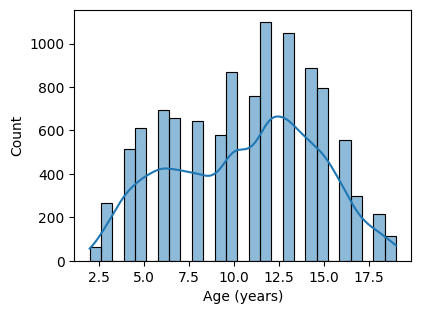

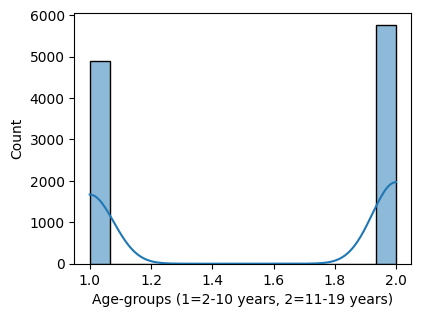

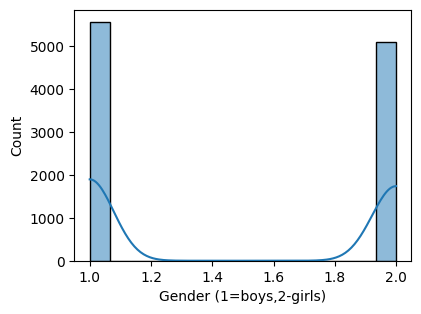

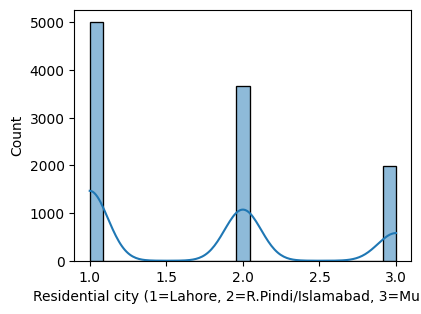

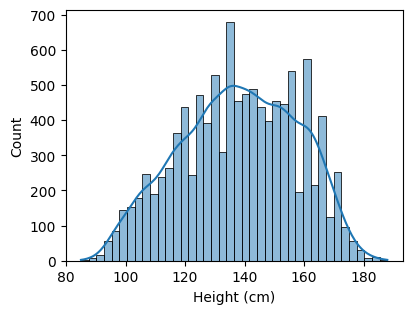

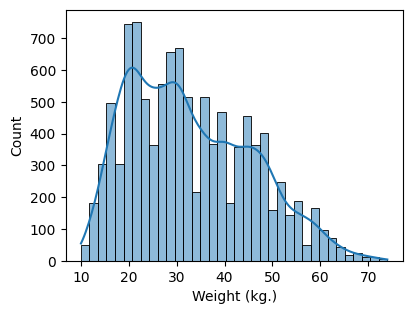

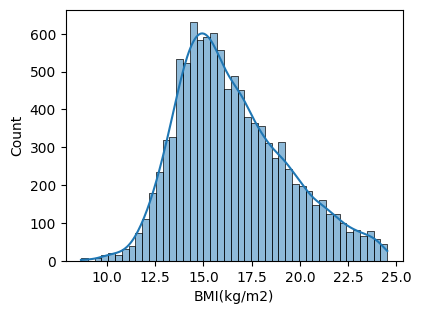

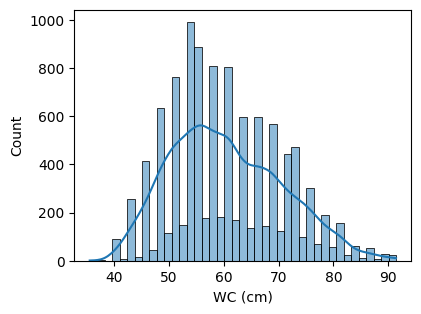

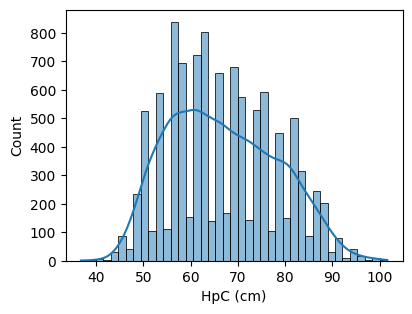

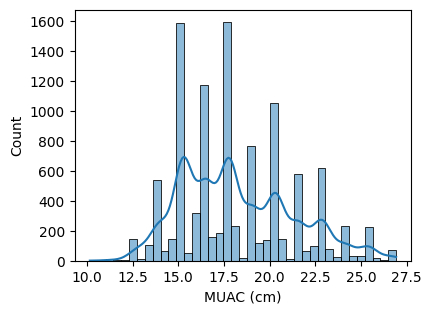

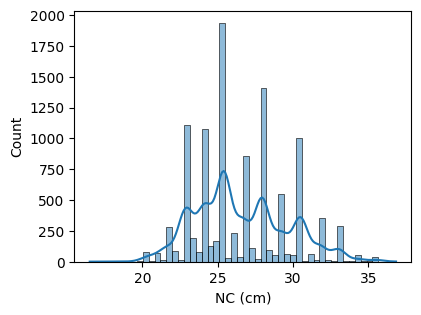

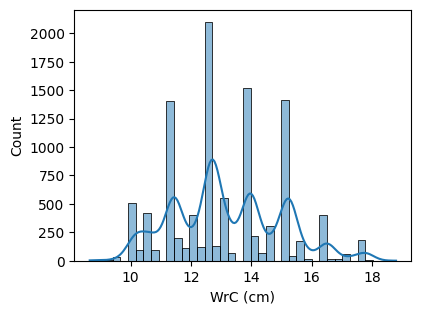

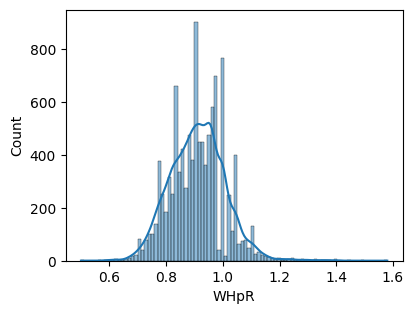

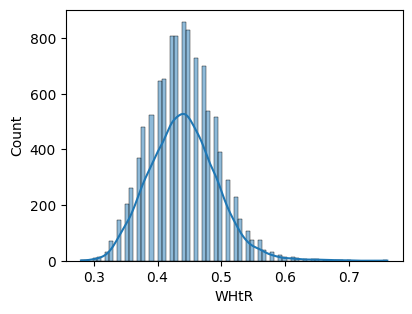

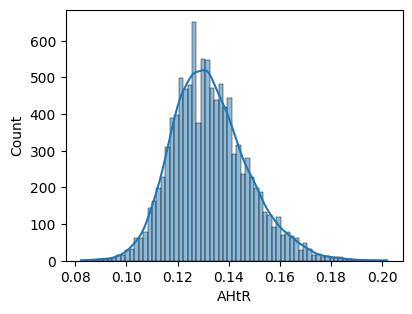

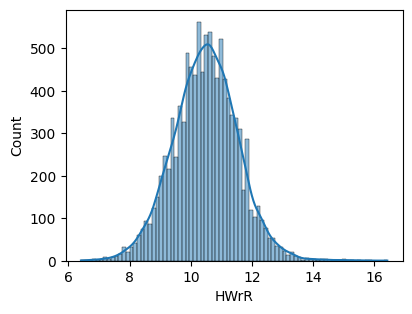

In [16]:
def plotting(var, num):
    plt.figure(figsize=(20, 15))
    plt.subplot(4, 4, num)
    sns.histplot(df[var], kde = True)

for col in df.columns:
    plotting(col, df.columns.get_loc(col) + 1)
    plt.savefig(f"T:\Machine Learning Course\Projects\Obesity Prediction in Pakistani Youth\Images\Histogram{df.columns.get_loc(col) + 1}.png")